# TC2023: MODELACIÓN DEL APRENDIZAJE CON IA

## Contenido

1. Leer archivo
1. Preprocesar los datos
1. Análisis y Visualización
1. Pronóstico usando ML - SL

## 1. Leer archivo

In [1]:
# importamos librerías
import warnings
warnings.filterwarnings("ignore")
import numpy as np # librería para poder usar arreglos
import pandas as pd # librería para poder usad DataFrames (tablas)
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [3]:
def get_data():
    """
    Function to get the data
    """

    dataSet = pd.read_csv("amazon_sales_data 2025.csv", header=0, index_col=1)
    dataSet.index = pd.to_datetime(dataSet.index,errors='ignore')
    dataSet = dataSet.sort_index()


    return dataSet

def infoData(dataSet):
    """
    Function to get general information about the data
    """

    print(dataSet.head(15))
    print("")
    print(dataSet.info())
    print("")
    print(dataSet.isnull().sum())
    print("")

In [4]:
data = get_data()
infoData(data)

           Order ID          Product         Category  Price  Quantity  \
Date                                                                     
2025-01-03  ORD0154       Headphones      Electronics    100         2   
2025-01-03  ORD0013           Laptop      Electronics    800         2   
2025-01-04  ORD0059       Smartwatch      Electronics    150         2   
2025-01-04  ORD0017          T-Shirt         Clothing     20         1   
2025-02-02  ORD0208     Refrigerator  Home Appliances   1200         3   
2025-02-03  ORD0025             Book            Books     15         5   
2025-02-03  ORD0039           Laptop      Electronics    800         2   
2025-02-03  ORD0008       Smartphone      Electronics    500         1   
2025-02-03  ORD0186  Washing Machine  Home Appliances    600         4   
2025-02-04  ORD0035           Laptop      Electronics    800         3   
2025-02-04  ORD0034          T-Shirt         Clothing     20         5   
2025-02-04  ORD0227       Headphones  

## 2. Preprocesar los datos

In [5]:
def pre_process(dataSet):
    """
    Function to pre process the data
    """

    dataSet["Product"] = [ 10 if x =='Book' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 9 if x =='Headphones' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 8 if x =='Jeans' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 7 if x =='Laptop' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 6 if x =='Refrigerator' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 5 if x =='Running Shoes' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 4 if x =='Smartphone' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 3 if x =='Smartwatch' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 2 if x =='T-Shirt' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 1 if x =='Washing Machine' else x for x in dataSet["Product"]]

    dataSet["Category"] = [ 5 if x =='Books' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 4 if x =='Clothing' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 3 if x =='Electronics' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 2 if x =='Footwear' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 1 if x =='Home Appliances' else x for x in dataSet["Category"]]

    dataSet["Customer Location"] = [ 10 if x =='Boston' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 9 if x =='Chicago' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 8 if x =='Dallas' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 7 if x =='Denver' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 6 if x =='Houston' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 5 if x =='Los Angeles' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 4 if x =='Miami' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 3 if x =='New York' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 2 if x =='San Francisco' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 1 if x =='Seattle' else x for x in dataSet["Customer Location"]]

    dataSet["Payment Method"] = [ 5 if x =='Amazon Pay' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 4 if x =='Credit Card' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 3 if x =='Debit Card' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 2 if x =='Gift Card' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 1 if x =='PayPal' else x for x in dataSet["Payment Method"]]

    dataSet["Status"] = [ 3 if x =='Cancelled' else x for x in dataSet["Status"]]
    dataSet["Status"] = [ 2 if x =='Pending' else x for x in dataSet["Status"]]
    dataSet["Status"] = [ 1 if x =='Completed' else x for x in dataSet["Status"]]

    return dataSet

In [6]:
preprocessData = pre_process(data)
infoData(preprocessData)

           Order ID  Product  Category  Price  Quantity  Total Sales  \
Date                                                                   
2025-01-03  ORD0154        9         3    100         2          200   
2025-01-03  ORD0013        7         3    800         2         1600   
2025-01-04  ORD0059        3         3    150         2          300   
2025-01-04  ORD0017        2         4     20         1           20   
2025-02-02  ORD0208        6         1   1200         3         3600   
2025-02-03  ORD0025       10         5     15         5           75   
2025-02-03  ORD0039        7         3    800         2         1600   
2025-02-03  ORD0008        4         3    500         1          500   
2025-02-03  ORD0186        1         1    600         4         2400   
2025-02-04  ORD0035        7         3    800         3         2400   
2025-02-04  ORD0034        2         4     20         5          100   
2025-02-04  ORD0227        9         3    100         5         

## 3. Análisis y Visualización

In [7]:
def getCorr(dataSet):
    """
    Function to get the EDA
    """

    print(dataSet.head())
    print("")
    print(dataSet.describe())
    print("")

    cols = ["Order ID", "Customer Name"]
    plt.figure()
    sns.heatmap(dataSet.drop(columns=cols).corr(), annot=True)
    plt.title('CORRELATION MATRIX', fontweight='bold')
    plt.show()
    print("")

    plt.figure()
    sns.pairplot(dataSet.drop(columns=cols), height=1.5)
    plt.show()
    print("")

def getEDA(dataSet):
    """
    Function to get the EDA
    """

    product_sales = dataSet.pivot_table(index="Product", values="Total Sales", aggfunc="sum")
    print(product_sales)
    print("")

    plt.figure()
    plt.bar(product_sales.index, product_sales["Total Sales"])
    plt.title('Total Sales by Product', fontweight='bold')
    plt.xlabel("Product", fontweight='bold')
    plt.ylabel("Total Sales", fontweight='bold')
    plt.show()
    print("")

    product_sales = product_sales.reset_index()
    product_sales["Product"] = product_sales["Product"].astype(str)
    fig = px.line_polar(product_sales, r='Total Sales', theta='Product', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title=dict(
        text='Total Sales by Product'),
        font=dict(color='darkblue'))
    fig.show()
    print("")

    category_sales = dataSet.pivot_table(index="Category", values="Total Sales", aggfunc="sum")
    print(category_sales)
    print("")

    category_sales = category_sales.reset_index()
    category_sales["Category"] = category_sales["Category"].astype(str)
    fig = px.line_polar(category_sales, r='Total Sales', theta='Category', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title='Total Sales by Category')
    fig.show()
    print("")

    location_sales = dataSet.pivot_table(index="Customer Location", values="Total Sales", aggfunc="sum")
    print(location_sales)
    print("")

    location_sales = location_sales.reset_index()
    location_sales["Customer Location"] = location_sales["Customer Location"].astype(str)
    fig = px.line_polar(location_sales, r='Total Sales', theta='Customer Location', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title='Total Sales by Customer Location')
    fig.show()
    print("")

    payment_sales = dataSet.pivot_table(index="Payment Method", values="Total Sales", aggfunc="sum")
    print(payment_sales)
    print("")

    payment_sales = payment_sales.reset_index()
    payment_sales["Payment Method"] = payment_sales["Payment Method"].astype(str)
    fig = px.line_polar(payment_sales, r='Total Sales', theta='Payment Method', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title='Total Sales by Payment Method')
    fig.show()
    print("")

    product_category = dataSet.pivot_table(index=['Product'], columns=['Category'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(product_category)
    print("")

    for col in range(len(product_category.columns)):
        plt.figure()
        plt.bar(product_category.index, product_category.iloc[:,col])
        plt.title("Category " + str(product_category.columns[col]), fontweight='bold')
        plt.xlabel("Product", fontweight='bold')
        plt.ylabel("Total Sales", fontweight='bold')
        plt.show()
        print("")

        print(f"Total sales in this categroy ${product_category.iloc[:,col].sum():,}")
        print("Product ", product_category.iloc[:,col].idxmax(),
              f" has the highest sales in this category ${product_category.iloc[:,col].max():,}")
        print("")


    product_quantity = dataSet.pivot_table(index=['Product'], columns=['Quantity'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(product_quantity)
    print("")

    for col in range(len(product_quantity.columns)):
        plt.figure()
        plt.bar(product_quantity.index, product_quantity.iloc[:,col])
        plt.title("Quantity " + str(product_quantity.columns[col]), fontweight='bold')
        plt.xlabel("Product", fontweight='bold')
        plt.ylabel("Total Sales", fontweight='bold')
        plt.show()
        print("")

        print(f"Total sales in this quantity ${product_quantity.iloc[:,col].sum():,}")
        print("Product ", product_quantity.iloc[:,col].idxmax(),
              f" has the highest sales in this quantity ${product_quantity.iloc[:,col].max():,}")
        print("")


    product_location = dataSet.pivot_table(index=['Product'], columns=['Customer Location'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(product_location)
    print("")

    for col in range(len(product_location.columns)):
        plt.figure()
        plt.bar(product_location.index, product_location.iloc[:,col])
        plt.title("Location " + str(product_location.columns[col]), fontweight='bold')
        plt.xlabel("Product", fontweight='bold')
        plt.ylabel("Total Sales", fontweight='bold')
        plt.show()
        print("")

        print(f"Total sales in this location ${product_location.iloc[:,col].sum():,}")
        print("Product ", product_location.iloc[:,col].idxmax(),
              f" has the highest sales in this location ${product_location.iloc[:,col].max():,}")
        print("")

    customer_sales = dataSet.pivot_table(index="Customer Name", values="Total Sales", aggfunc="sum")
    print(customer_sales.sort_values(by="Total Sales", ascending=False))
    print("")

    customer_category = dataSet.pivot_table(index=['Customer Name'], columns=['Category'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(customer_category)
    print("")

    df_customer_category = customer_category.reset_index().melt(id_vars='Customer Name', var_name='Category',
                                                                value_name='Total Sales')
    df_customer_category['Category'] = df_customer_category['Category'].astype(str)
    fig = px.line_polar(df_customer_category, r='Total Sales', theta='Category', color='Customer Name',
                        line_close=True, title="Total Sales per Category by Customer")
    fig.update_traces(fill = 'toself')
    fig.show()
    print("")

    dict_customer_category = {"Category": customer_category.columns, "Customer":customer_category.idxmax().values, "Sales": customer_category.max().values}
    df_dict_customer_category = pd.DataFrame(dict_customer_category)
    df_dict_customer_category.set_index("Category", inplace=True)
    print(df_dict_customer_category)
    print("")

    customer_product = dataSet.pivot_table(index=['Customer Name'], columns=['Product'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(customer_product)
    print("")

    df_customer_product = customer_product.reset_index().melt(id_vars='Customer Name', var_name='Product',
                                                                value_name='Total Sales')
    df_customer_product['Product'] = df_customer_product['Product'].astype(str)
    fig = px.line_polar(df_customer_product, r='Total Sales', theta='Product', color='Customer Name',
                        line_close=True, title="Total Sales per Product by Customer")
    fig.update_traces(fill = 'toself')
    fig.show()
    print("")

    dict_customer_product = {"Product": customer_product.columns, "Customer":customer_product.idxmax().values, "Sales": customer_product.max().values}
    df_dict_customer_product = pd.DataFrame(dict_customer_product)
    df_dict_customer_product.set_index("Product", inplace=True)
    print(df_dict_customer_product)
    print("")

    customer_location = dataSet.pivot_table(index=['Customer Name'], columns=['Customer Location'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(customer_location)
    print("")

    dict_customer_location = {"Location": customer_location.columns, "Customer":customer_location.idxmax().values, "Sales": customer_location.max().values}
    df_dict_customer_location = pd.DataFrame(dict_customer_location)
    df_dict_customer_location.set_index("Location", inplace=True)
    print(df_dict_customer_location)
    print("")



           Order ID  Product  Category  Price  Quantity  Total Sales  \
Date                                                                   
2025-01-03  ORD0154        9         3    100         2          200   
2025-01-03  ORD0013        7         3    800         2         1600   
2025-01-04  ORD0059        3         3    150         2          300   
2025-01-04  ORD0017        2         4     20         1           20   
2025-02-02  ORD0208        6         1   1200         3         3600   

            Customer Name  Customer Location  Payment Method  Status  
Date                                                                  
2025-01-03       John Doe                  7               3       1  
2025-01-03  Daniel Harris                  2               2       2  
2025-01-04  Daniel Harris                  8               4       3  
2025-01-04     Emma Clark                  3               5       1  
2025-02-02       John Doe                  4               1       1 

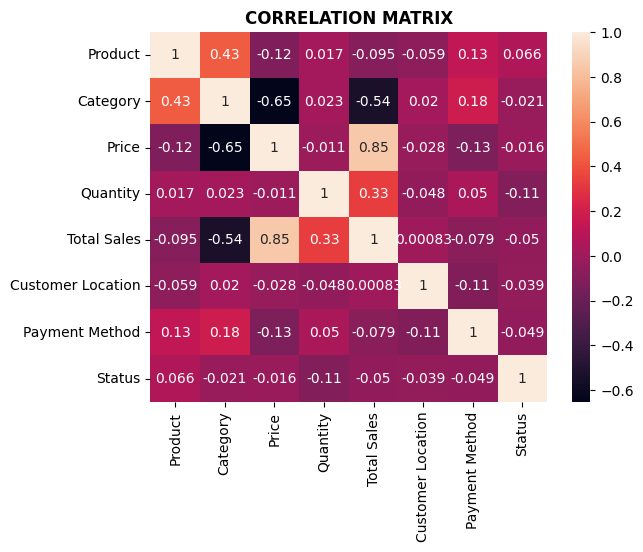

<Figure size 640x480 with 0 Axes>

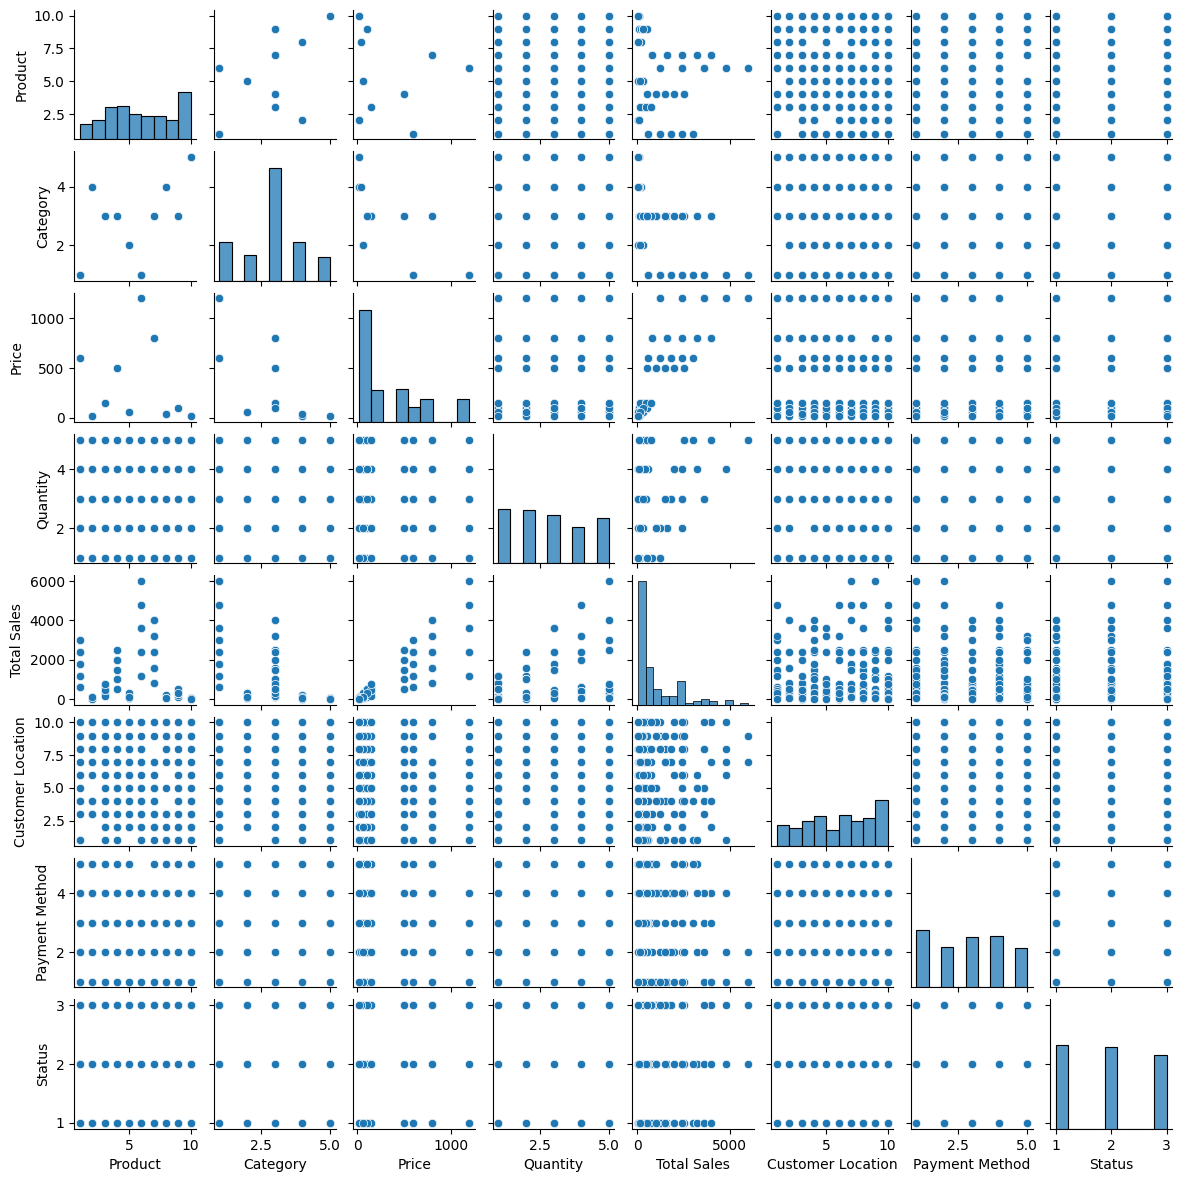

In [8]:
getCorr(preprocessData)

         Total Sales
Product             
1              27000
2               1060
3              15750
4              48500
5               4320
6              78000
7              58400
8               2480
9               7300
10              1035



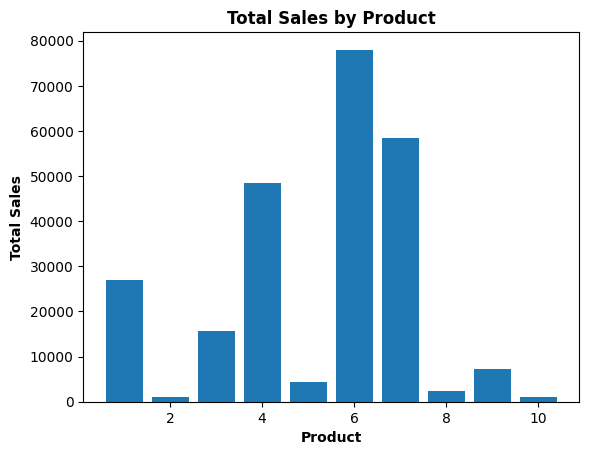


          Total Sales
Category             
1              105000
2                4320
3              129950
4                3540
5                1035




                   Total Sales
Customer Location             
1                        26890
2                        16195
3                        18940
4                        31700
5                        17820
6                        28390
7                        29785
8                        27145
9                        20810
10                       26170




                Total Sales
Payment Method             
1                     69645
2                     47955
3                     31900
4                     61595
5                     32750




Category      1     2      3     4     5
Product                                 
1         27000     0      0     0     0
2             0     0      0  1060     0
3             0     0  15750     0     0
4             0     0  48500     0     0
5             0  4320      0     0     0
6         78000     0      0     0     0
7             0     0  58400     0     0
8             0     0      0  2480     0
9             0     0   7300     0     0
10            0     0      0     0  1035



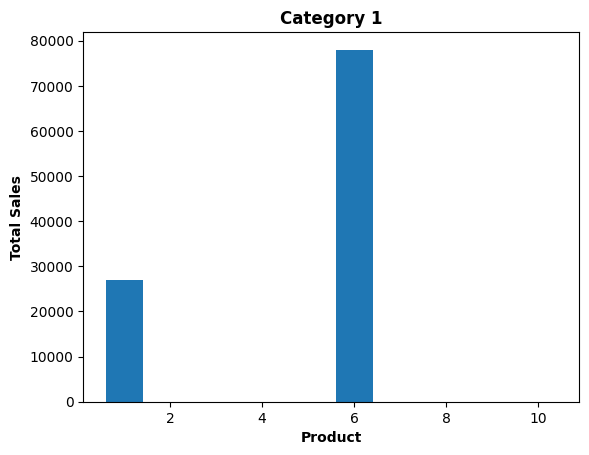


Total sales in this categroy $105,000
Product  6  has the highest sales in this category $78,000



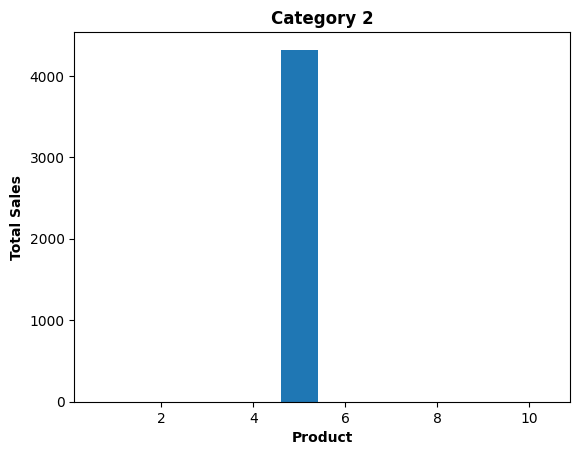


Total sales in this categroy $4,320
Product  5  has the highest sales in this category $4,320



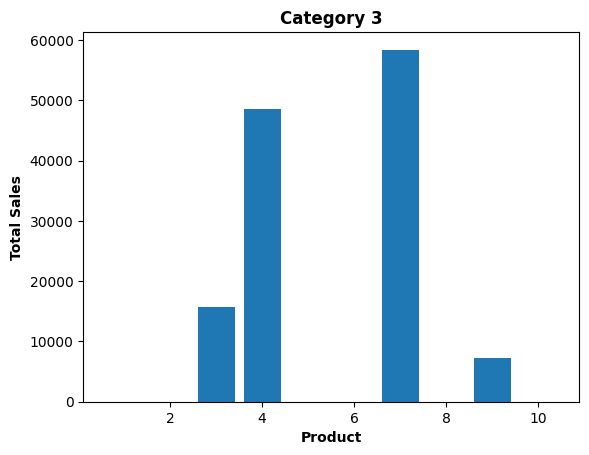


Total sales in this categroy $129,950
Product  7  has the highest sales in this category $58,400



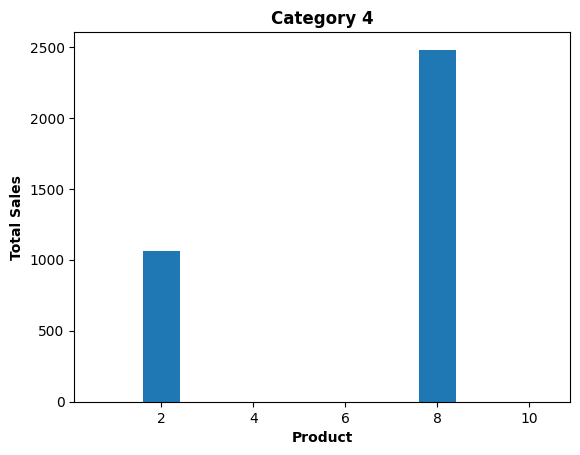


Total sales in this categroy $3,540
Product  8  has the highest sales in this category $2,480



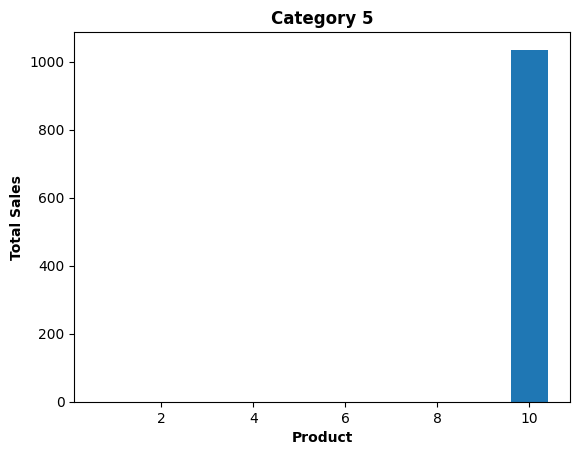


Total sales in this categroy $1,035
Product  10  has the highest sales in this category $1,035

Quantity     1      2      3      4      5
Product                                   
1         2400   3600   5400   9600   6000
2          120    200    180    160    400
3          600   3300   2700   2400   6750
4         4500   8000   9000  12000  15000
5          360    960   1080    720   1200
6         6000  14400  21600  24000  12000
7         3200   4800  21600  12800  16000
8          160    400    240    480   1200
9          400   1000   2400   2000   1500
10         165     60     90    120    600



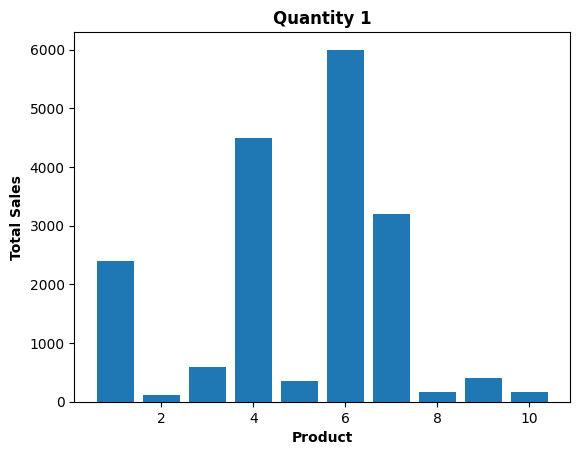


Total sales in this quantity $17,905
Product  6  has the highest sales in this quantity $6,000



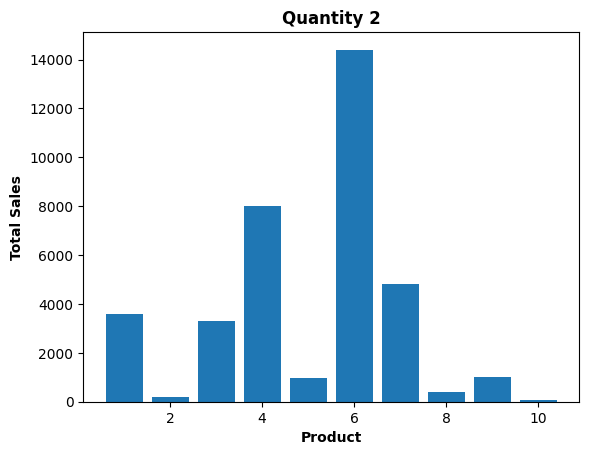


Total sales in this quantity $36,720
Product  6  has the highest sales in this quantity $14,400



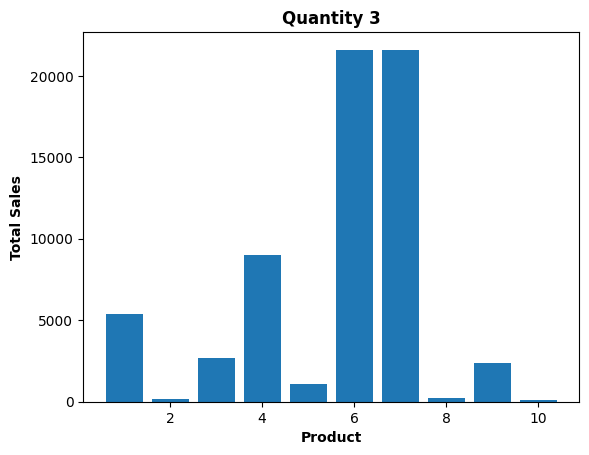


Total sales in this quantity $64,290
Product  6  has the highest sales in this quantity $21,600



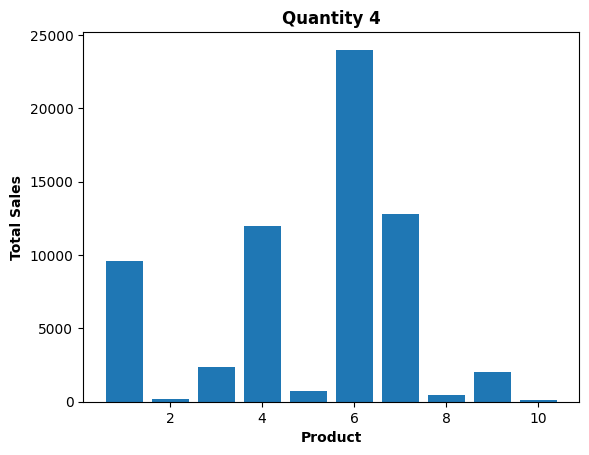


Total sales in this quantity $64,280
Product  6  has the highest sales in this quantity $24,000



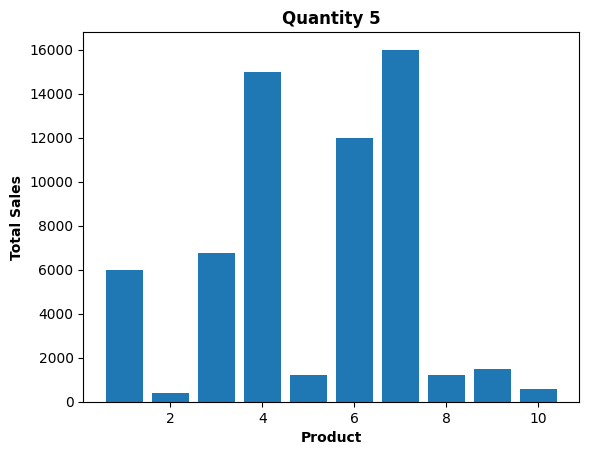


Total sales in this quantity $60,650
Product  7  has the highest sales in this quantity $16,000

Customer Location     1      2     3     4     5     6      7      8     9   \
Product                                                                       
1                   4800      0  2400  5400  2400  4800   1800   3600  1200   
2                      0      0   160   100     0    80    320    140   100   
3                   1200   1200  1950  1200  1050  3300   1650   1650   300   
4                   5500    500  2000  9500  1500  5000   4000   4500  9500   
5                      0    480   360   780   660   780    360    480   240   
6                  10800   2400  4800  4800  3600  4800  13200  15600  6000   
7                   3200  10400  5600  8800  8000  8000   8000      0  2400   
8                    400    160   640     0    80     0     80    800   160   
9                    900    800  1000  1000   500  1600    300    300   700   
10                    90    255  

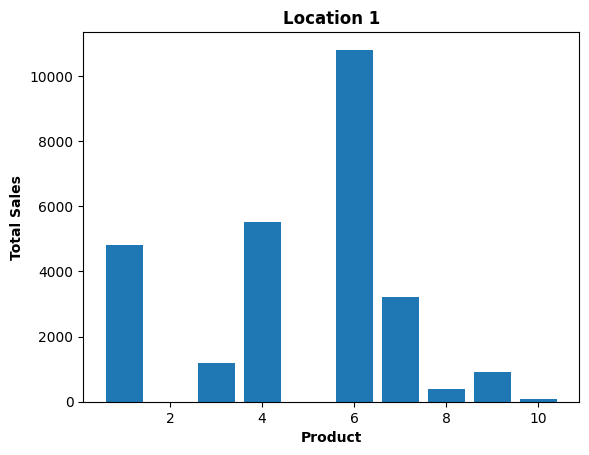


Total sales in this location $26,890
Product  6  has the highest sales in this location $10,800



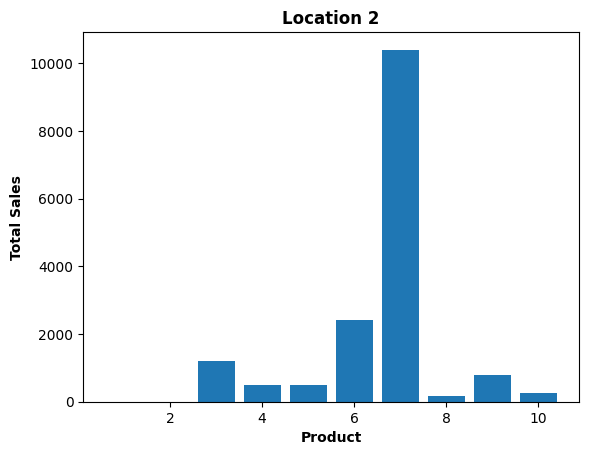


Total sales in this location $16,195
Product  7  has the highest sales in this location $10,400



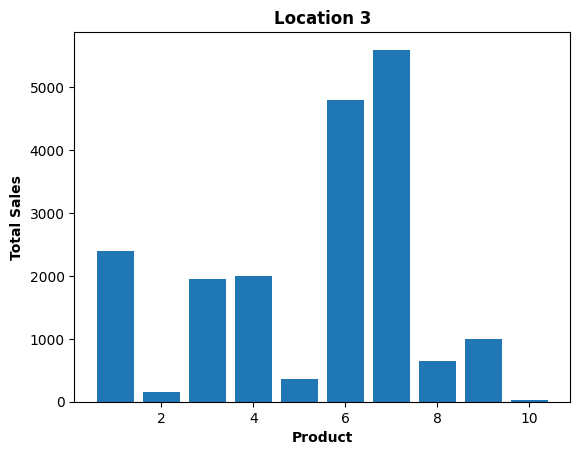


Total sales in this location $18,940
Product  7  has the highest sales in this location $5,600



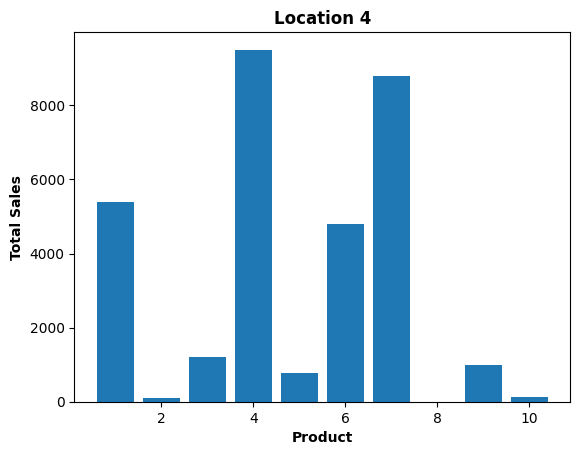


Total sales in this location $31,700
Product  4  has the highest sales in this location $9,500



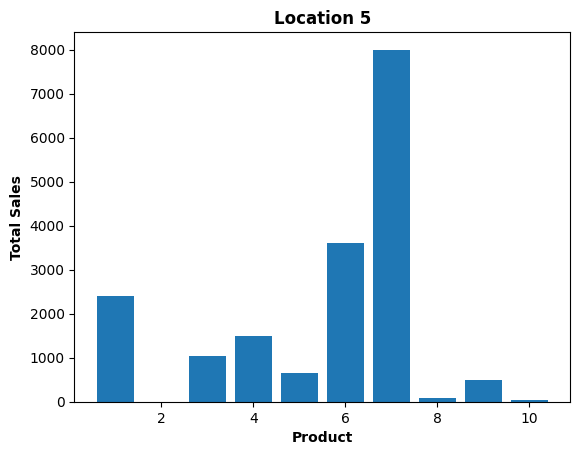


Total sales in this location $17,820
Product  7  has the highest sales in this location $8,000



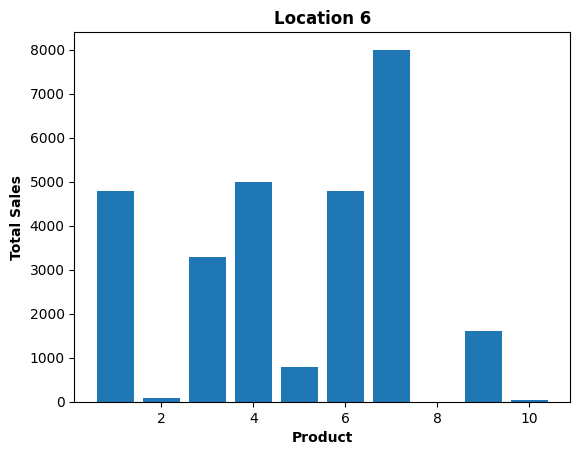


Total sales in this location $28,390
Product  7  has the highest sales in this location $8,000



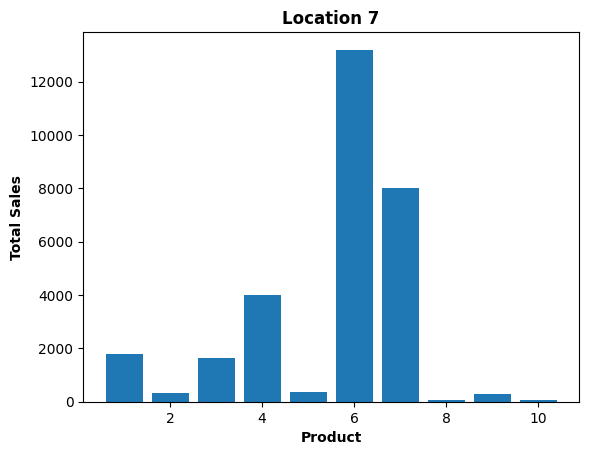


Total sales in this location $29,785
Product  6  has the highest sales in this location $13,200



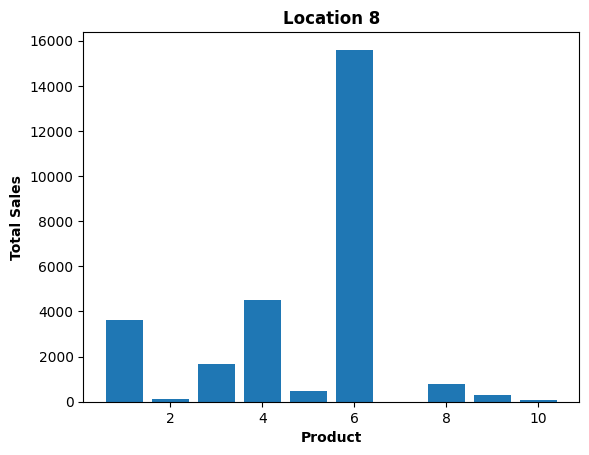


Total sales in this location $27,145
Product  6  has the highest sales in this location $15,600



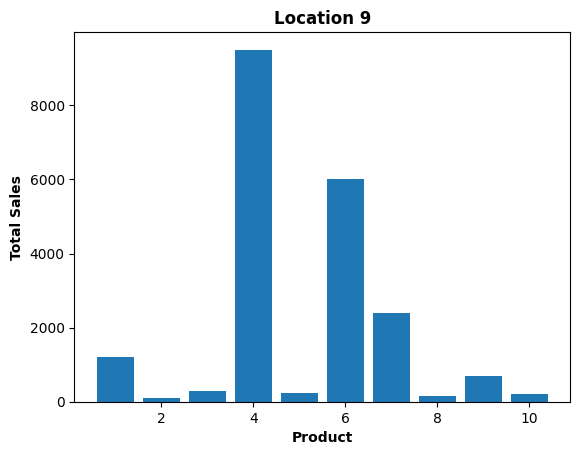


Total sales in this location $20,810
Product  4  has the highest sales in this location $9,500



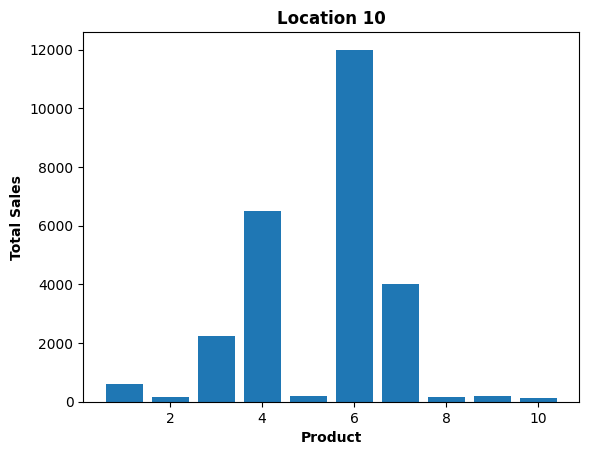


Total sales in this location $26,170
Product  6  has the highest sales in this location $12,000

               Total Sales
Customer Name             
Olivia Wilson        36170
Jane Smith           31185
Emma Clark           29700
John Doe             26870
Emily Johnson        23475
David Lee            22665
Michael Brown        22655
Daniel Harris        18945
Chris White          18885
Sophia Miller        13295

Category           1     2      3    4    5
Customer Name                              
Chris White     9600   480   8550  180   75
Daniel Harris   7200     0  11050  560  135
David Lee      15600   360   6100  320  285
Emily Johnson   7800   360  15100  200   15
Emma Clark      9600  1200  18550  260   90
Jane Smith     12600   660  17300  520  105
John Doe       11400   120  14800  460   90
Michael Brown   7200   300  14600  480   75
Olivia Wilson  16800   540  18400  340   90
Sophia Miller   7200   300   5500  220   75




               Customer  Sales
Category                      
1         Olivia Wilson  16800
2            Emma Clark   1200
3            Emma Clark  18550
4         Daniel Harris    560
5             David Lee    285

Product          1    2     3     4     5      6      7    8     9    10
Customer Name                                                           
Chris White    3600  100  1050  4500   480   6000   2400   80   600   75
Daniel Harris     0   80  1350  1000     0   7200   7200  480  1500  135
David Lee      1200   40  1500  4000   360  14400      0  280   600  285
Emily Johnson  3000    0  2400  7000   360   4800   4800  200   900   15
Emma Clark     6000  260  1950  6500  1200   3600   9600    0   500   90
Jane Smith     3000  280  1200  2500   660   9600  12800  240   800  105
John Doe        600   20  2400  4500   120  10800   7200  440   700   90
Michael Brown  7200   40  1800  5500   300      0   6400  440   900   75
Olivia Wilson  2400  180   900  9000   540  14400  


              Customer  Sales
Product                      
1        Michael Brown   7200
2           Jane Smith    280
3        Emily Johnson   2400
4        Olivia Wilson   9000
5           Emma Clark   1200
6            David Lee  14400
7           Jane Smith  12800
8        Daniel Harris    480
9        Daniel Harris   1500
10           David Lee    285

Customer Location    1     2     3     4      5     6     7     8      9   \
Customer Name                                                               
Chris White        3600     0   900  3040     30  2790    40  5120   1320   
Daniel Harris       700  4000  4040  1315      0  6850     0  1700    140   
David Lee             0   210   215   515    120   720  6080  1240   2875   
Emily Johnson      2150   900  1450  2500    740  1500  9420  2100   2700   
Emma Clark          615  1025   650  6300  10600  5230  2500   360   2000   
Jane Smith         4700   400  4150  1530   3700  2460   180  9125    900   
John Doe            91

In [9]:
getEDA(preprocessData)

## 4. Pronóstico usando ML - SL

### Prepare the data for the model

In [10]:
def process_data(dataSet):
    """
    Function to process the data
    """

    dataSet["Customer Name"] = [ 10 if x =='Chris White' else x for x in dataSet["Customer Name"]]
    dataSet["Customer Name"] = [ 9 if x =='Daniel Harris' else x for x in dataSet["Customer Name"]]
    dataSet["Customer Name"] = [ 8 if x =='David Lee' else x for x in dataSet["Customer Name"]]
    dataSet["Customer Name"] = [ 7 if x =='Emily Johnson' else x for x in dataSet["Customer Name"]]
    dataSet["Customer Name"] = [ 6 if x =='Emma Clark' else x for x in dataSet["Customer Name"]]
    dataSet["Customer Name"] = [ 5 if x =='Jane Smith' else x for x in dataSet["Customer Name"]]
    dataSet["Customer Name"] = [ 4 if x =='John Doe' else x for x in dataSet["Customer Name"]]
    dataSet["Customer Name"] = [ 3 if x =='Michael Brown' else x for x in dataSet["Customer Name"]]
    dataSet["Customer Name"] = [ 2 if x =='Olivia Wilson' else x for x in dataSet["Customer Name"]]
    dataSet["Customer Name"] = [ 1 if x =='Sophia Miller' else x for x in dataSet["Customer Name"]]

    columns_list = ["Total Sales", "Product", "Category", "Quantity", "Customer Name", "Customer Location"]

    filter_dataSet = dataSet[columns_list]

    filter_dataSet = filter_dataSet.sort_index()

    standardizer = preprocessing.StandardScaler()
    standardizer.fit(filter_dataSet)
    new_dataSet = standardizer.transform(filter_dataSet)

    new_dataSet = pd.DataFrame(np.round(new_dataSet,4), columns=columns_list)
    new_dataSet.index = filter_dataSet.index
    new_dataSet = new_dataSet.sort_index()

    return new_dataSet



In [11]:
dataprocess = process_data(preprocessData)
print(dataprocess.head(15))
print("")
print(dataprocess["Category"].unique())

            Total Sales  Product  Category  Quantity  Customer Name  \
Date                                                                  
2025-01-03      -0.6205   1.2743    0.0596   -0.6000        -0.5614   
2025-01-03       0.4999   0.5420    0.0596   -0.6000         1.2805   
2025-01-04      -0.5405  -0.9228    0.0596   -0.6000         1.2805   
2025-01-04      -0.7645  -1.2890    0.9355   -1.3010         0.1753   
2025-02-02       2.1004   0.1758   -1.6923    0.1009        -0.5614   
2025-02-03      -0.7205   1.6405    1.8114    1.5028        -1.6665   
2025-02-03       0.4999   0.5420    0.0596   -0.6000        -1.2981   
2025-02-03      -0.3804  -0.5566    0.0596   -1.3010        -1.6665   
2025-02-03       1.1401  -1.6552   -1.6923    0.8019        -0.9298   
2025-02-04       1.1401   0.5420    0.0596    0.1009         0.1753   
2025-02-04      -0.7005  -1.2890    0.9355    1.5028        -0.1930   
2025-02-04      -0.3804   1.2743    0.0596    1.5028         0.1753   
2025-0

In [12]:
dataprocess = dataprocess[dataprocess["Category"] == 0.0596]
print(dataprocess.head(15))

            Total Sales  Product  Category  Quantity  Customer Name  \
Date                                                                  
2025-01-03      -0.6205   1.2743    0.0596   -0.6000        -0.5614   
2025-01-03       0.4999   0.5420    0.0596   -0.6000         1.2805   
2025-01-04      -0.5405  -0.9228    0.0596   -0.6000         1.2805   
2025-02-03       0.4999   0.5420    0.0596   -0.6000        -1.2981   
2025-02-03      -0.3804  -0.5566    0.0596   -1.3010        -1.6665   
2025-02-04       1.1401   0.5420    0.0596    0.1009         0.1753   
2025-02-04      -0.3804   1.2743    0.0596    1.5028         0.1753   
2025-02-14      -0.5405  -0.9228    0.0596   -0.6000         1.6488   
2025-02-15      -0.4604   1.2743    0.0596    0.8019         1.2805   
2025-02-16      -0.5405   1.2743    0.0596    0.1009        -0.9298   
2025-02-16       2.4205   0.5420    0.0596    1.5028        -0.1930   
2025-02-16       2.4205   0.5420    0.0596    1.5028         0.5437   
2025-0

In [13]:
train_data, test_data = train_test_split(dataprocess, test_size=0.25, shuffle=False)#, random_state=42)
print(train_data.head(15))
print("")
print(len(train_data))
print("")
print(test_data.head(15))
print("")
print(len(test_data))

            Total Sales  Product  Category  Quantity  Customer Name  \
Date                                                                  
2025-01-03      -0.6205   1.2743    0.0596   -0.6000        -0.5614   
2025-01-03       0.4999   0.5420    0.0596   -0.6000         1.2805   
2025-01-04      -0.5405  -0.9228    0.0596   -0.6000         1.2805   
2025-02-03       0.4999   0.5420    0.0596   -0.6000        -1.2981   
2025-02-03      -0.3804  -0.5566    0.0596   -1.3010        -1.6665   
2025-02-04       1.1401   0.5420    0.0596    0.1009         0.1753   
2025-02-04      -0.3804   1.2743    0.0596    1.5028         0.1753   
2025-02-14      -0.5405  -0.9228    0.0596   -0.6000         1.6488   
2025-02-15      -0.4604   1.2743    0.0596    0.8019         1.2805   
2025-02-16      -0.5405   1.2743    0.0596    0.1009        -0.9298   
2025-02-16       2.4205   0.5420    0.0596    1.5028        -0.1930   
2025-02-16       2.4205   0.5420    0.0596    1.5028         0.5437   
2025-0

### Model with initial param

In [14]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(train_data.iloc[:,1:], train_data.iloc[:,0])
tr_results = {"Real Total Sales": train_data.iloc[:,0], "Pred. Total Sales": regr.predict(train_data.iloc[:,1:])}
train_results = pd.DataFrame(tr_results)
train_results["Residuals"] = train_results["Real Total Sales"] - train_results["Pred. Total Sales"]
train_results['Rel. Error'] = (1-(train_results['Pred. Total Sales']/train_results['Real Total Sales'])).abs()
train_results = train_results.sort_index()

ts_results = {"Real Total Sales": test_data.iloc[:,0], "Pred. Total Sales": regr.predict(test_data.iloc[:,1:])}
test_results = pd.DataFrame(ts_results)
test_results["Residuals"] = test_results["Real Total Sales"] - test_results["Pred. Total Sales"]
test_results['Rel. Error'] = (1-(test_results['Pred. Total Sales']/test_results['Real Total Sales'])).abs()
test_results = test_results.sort_index()

print(round(train_results.head(),1))
print("")
print(round(test_results.head(),1))

            Real Total Sales  Pred. Total Sales  Residuals  Rel. Error
Date                                                                  
2025-01-03              -0.6               -0.6        0.0         0.0
2025-01-03               0.5               -0.1        0.6         1.2
2025-01-04              -0.5               -0.6        0.0         0.1
2025-02-03               0.5               -0.1        0.6         1.2
2025-02-03              -0.4               -0.1       -0.3         0.8

            Real Total Sales  Pred. Total Sales  Residuals  Rel. Error
Date                                                                  
2025-05-02              -0.5               -0.5       -0.0         0.0
2025-05-03               1.2                1.3       -0.1         0.1
2025-06-02               0.4                1.3       -0.9         2.1
2025-06-02              -0.1               -0.1       -0.1         0.4
2025-06-02              -0.5               -0.4       -0.0         0.1


In [15]:
tr_metrics = {"MSE": [mean_squared_error(train_results.iloc[:,0], train_results.iloc[:,1])],
              "MAE": [mean_absolute_error(train_results.iloc[:,0], train_results.iloc[:,1])],
              "MAPE": [mean_absolute_percentage_error(train_results.iloc[:,0], train_results.iloc[:,1])],
              "R2": [r2_score(train_results.iloc[:,0], train_results.iloc[:,1])]}
train_metrics = pd.DataFrame(tr_metrics, index=["Train"])
train_metrics["RMSE"]=(train_metrics["MSE"]**0.5)

ts_metrics = {"MSE": [mean_squared_error(test_results.iloc[:,0], test_results.iloc[:,1])],
              "MAE": [mean_absolute_error(test_results.iloc[:,0], test_results.iloc[:,1])],
              "MAPE": [mean_absolute_percentage_error(test_results.iloc[:,0], test_results.iloc[:,1])],
              "R2": [r2_score(test_results.iloc[:,0], test_results.iloc[:,1])]}
test_metrics = pd.DataFrame(ts_metrics, index=["Test"])
test_metrics["RMSE"]=(test_metrics["MSE"]**0.5)

columns = ["RMSE", "MSE", "MAE", "MAPE", "R2"]
train_metrics = train_metrics[columns]
test_metrics = test_metrics[columns]
print(train_metrics)
print("")
print(test_metrics)

           RMSE       MSE       MAE      MAPE        R2
Train  0.333223  0.111038  0.194586  0.613839  0.836365

         RMSE       MSE       MAE     MAPE        R2
Test  0.39182  0.153523  0.250629  0.96465  0.729774


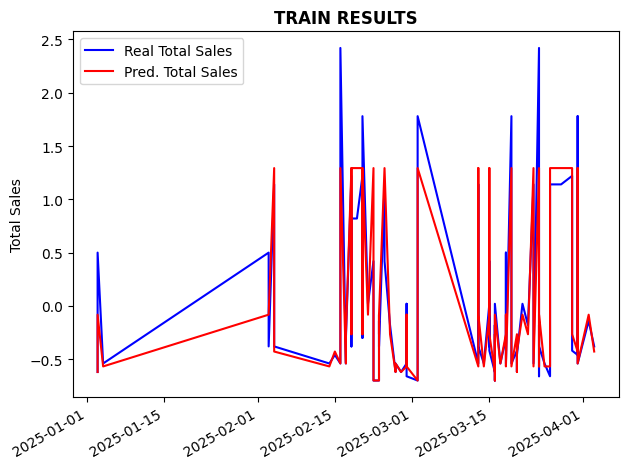

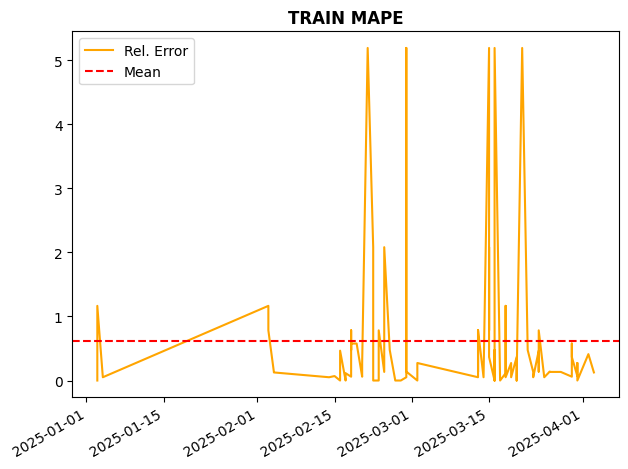

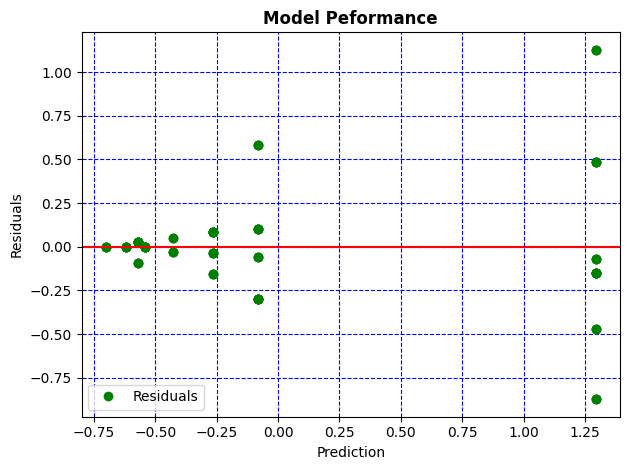

In [16]:
plt.figure()
plt.plot(train_results["Real Total Sales"], color="b", label="Real Total Sales")
plt.plot(train_results["Pred. Total Sales"], color="r", label="Pred. Total Sales")
plt.gcf().autofmt_xdate()
plt.title('TRAIN RESULTS', fontweight='bold')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()
print("")

plt.figure()
plt.plot(train_results["Rel. Error"], color="orange", label="Rel. Error")
plt.axhline(train_metrics["MAPE"].iloc[0], color='r', linestyle='dashed', label='Mean')
plt.gcf().autofmt_xdate()
plt.title('TRAIN MAPE', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()
print("")

plt.figure()
plt.plot(train_results['Pred. Total Sales'], train_results['Residuals'],'o', color='g',label='Residuals')
plt.grid(color='b',linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Model Peformance", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

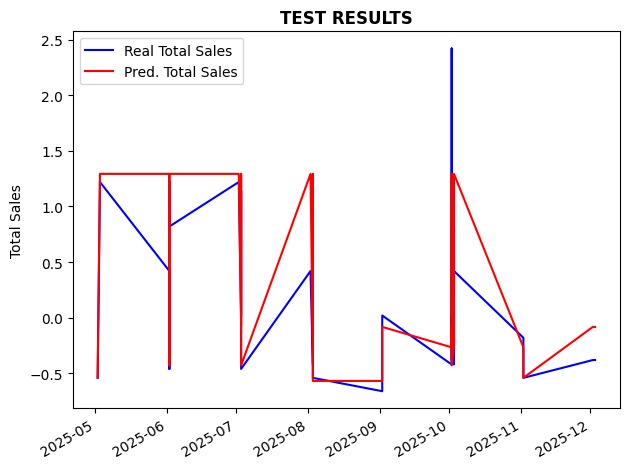

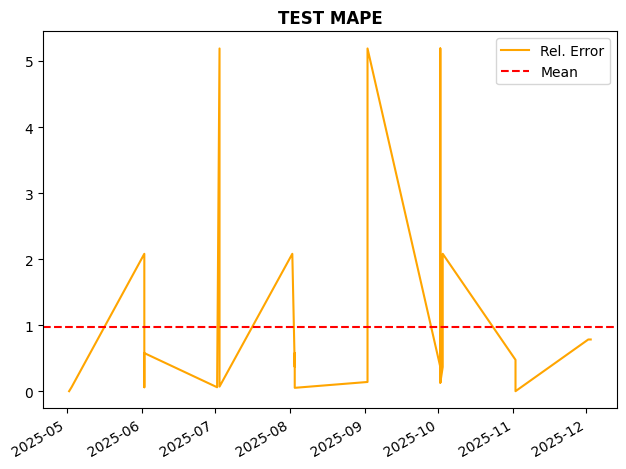

In [17]:
plt.figure()
plt.plot(test_results["Real Total Sales"], color="b", label="Real Total Sales")
plt.plot(test_results["Pred. Total Sales"], color="r", label="Pred. Total Sales")
plt.gcf().autofmt_xdate()
plt.title('TEST RESULTS', fontweight='bold')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()
print("")

plt.figure()
plt.plot(test_results["Rel. Error"], color="orange", label="Rel. Error")
plt.axhline(test_metrics["MAPE"].iloc[0], color='r', linestyle='dashed', label='Mean')
plt.gcf().autofmt_xdate()
plt.title('TEST MAPE', fontweight='bold')
plt.tight_layout()
plt.legend()
plt.show()

### Model with second param

In [18]:
regr = DecisionTreeRegressor(max_depth=4)
regr.fit(train_data.iloc[:,1:], train_data.iloc[:,0])
tr_results = {"Real Total Sales": train_data.iloc[:,0], "Pred. Total Sales": regr.predict(train_data.iloc[:,1:])}
train_results = pd.DataFrame(tr_results)
train_results["Residuals"] = train_results["Real Total Sales"] - train_results["Pred. Total Sales"]
train_results['Rel. Error'] = (1-(train_results['Pred. Total Sales']/train_results['Real Total Sales'])).abs()
train_results = train_results.sort_index()

ts_results = {"Real Total Sales": test_data.iloc[:,0], "Pred. Total Sales": regr.predict(test_data.iloc[:,1:])}
test_results = pd.DataFrame(ts_results)
test_results["Residuals"] = test_results["Real Total Sales"] - test_results["Pred. Total Sales"]
test_results['Rel. Error'] = (1-(test_results['Pred. Total Sales']/test_results['Real Total Sales'])).abs()
test_results = test_results.sort_index()

print(round(train_results.head(),1))
print("")
print(round(test_results.head(),1))

            Real Total Sales  Pred. Total Sales  Residuals  Rel. Error
Date                                                                  
2025-01-03              -0.6               -0.6        0.0         0.0
2025-01-03               0.5                0.2        0.3         0.6
2025-01-04              -0.5               -0.5       -0.0         0.0
2025-02-03               0.5                0.2        0.3         0.6
2025-02-03              -0.4               -0.3       -0.1         0.2

            Real Total Sales  Pred. Total Sales  Residuals  Rel. Error
Date                                                                  
2025-05-02              -0.5               -0.5       -0.0         0.0
2025-05-03               1.2                0.8        0.4         0.3
2025-06-02               0.4                0.8       -0.4         1.0
2025-06-02              -0.1               -0.3        0.2         1.2
2025-06-02              -0.5               -0.5        0.0         0.0


In [19]:
tr_metrics = {"MSE": [mean_squared_error(train_results.iloc[:,0], train_results.iloc[:,1])],
              "MAE": [mean_absolute_error(train_results.iloc[:,0], train_results.iloc[:,1])],
              "MAPE": [mean_absolute_percentage_error(train_results.iloc[:,0], train_results.iloc[:,1])],
              "R2": [r2_score(train_results.iloc[:,0], train_results.iloc[:,1])]}
train_metrics = pd.DataFrame(tr_metrics, index=["Train"])
train_metrics["RMSE"]=(train_metrics["MSE"]**0.5)

ts_metrics = {"MSE": [mean_squared_error(test_results.iloc[:,0], test_results.iloc[:,1])],
              "MAE": [mean_absolute_error(test_results.iloc[:,0], test_results.iloc[:,1])],
              "MAPE": [mean_absolute_percentage_error(test_results.iloc[:,0], test_results.iloc[:,1])],
              "R2": [r2_score(test_results.iloc[:,0], test_results.iloc[:,1])]}
test_metrics = pd.DataFrame(ts_metrics, index=["Test"])
test_metrics["RMSE"]=(test_metrics["MSE"]**0.5)

columns = ["RMSE", "MSE", "MAE", "MAPE", "R2"]
train_metrics = train_metrics[columns]
test_metrics = test_metrics[columns]
print(train_metrics)
print("")
print(test_metrics)

          RMSE       MSE       MAE      MAPE        R2
Train  0.24236  0.058738  0.136632  0.700924  0.913438

          RMSE       MSE       MAE      MAPE        R2
Test  0.271199  0.073549  0.173225  1.149149  0.870542


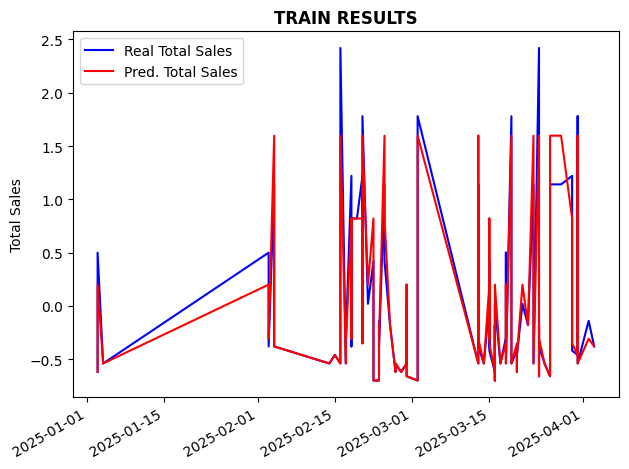

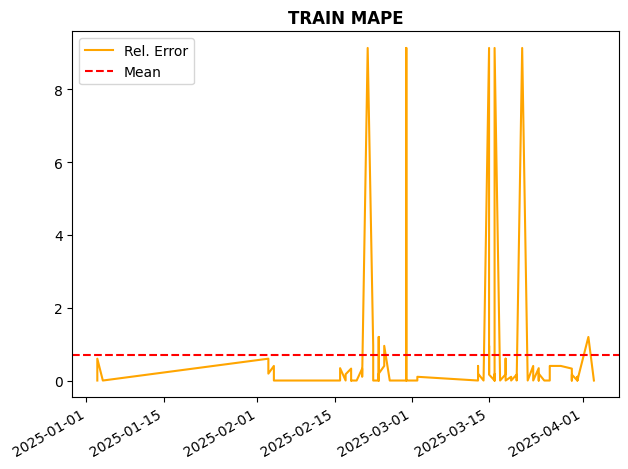

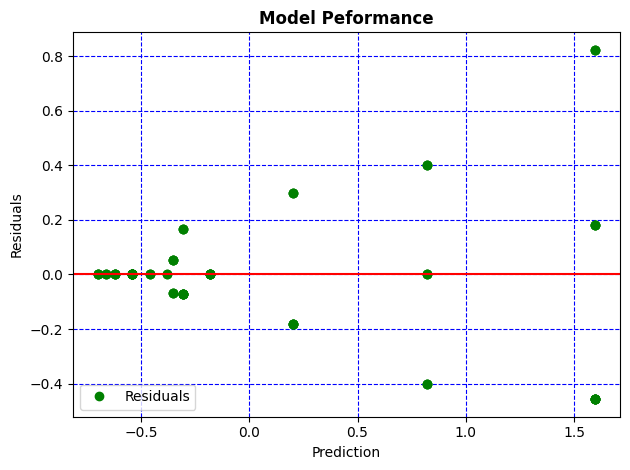

In [20]:
plt.figure()
plt.plot(train_results["Real Total Sales"], color="b", label="Real Total Sales")
plt.plot(train_results["Pred. Total Sales"], color="r", label="Pred. Total Sales")
plt.gcf().autofmt_xdate()
plt.title('TRAIN RESULTS', fontweight='bold')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()
print("")

plt.figure()
plt.plot(train_results["Rel. Error"], color="orange", label="Rel. Error")
plt.axhline(train_metrics["MAPE"].iloc[0], color='r', linestyle='dashed', label='Mean')
plt.gcf().autofmt_xdate()
plt.title('TRAIN MAPE', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()
print("")

plt.figure()
plt.plot(train_results['Pred. Total Sales'], train_results['Residuals'],'o', color='g',label='Residuals')
plt.grid(color='b',linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Model Peformance", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

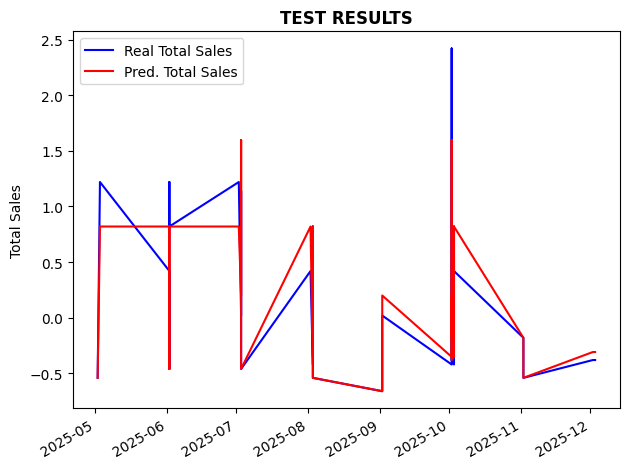

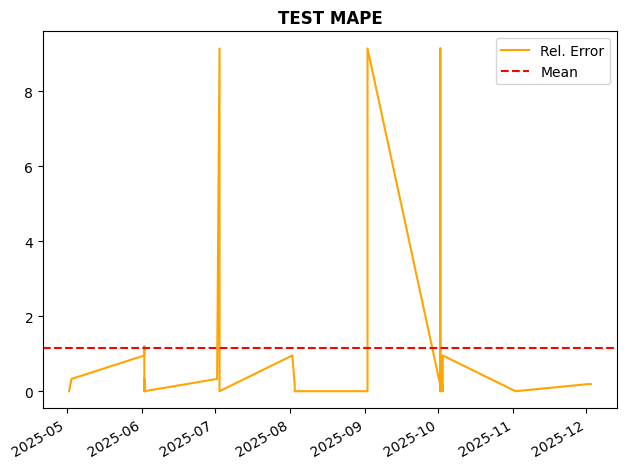

In [21]:
plt.figure()
plt.plot(test_results["Real Total Sales"], color="b", label="Real Total Sales")
plt.plot(test_results["Pred. Total Sales"], color="r", label="Pred. Total Sales")
plt.gcf().autofmt_xdate()
plt.title('TEST RESULTS', fontweight='bold')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()
print("")

plt.figure()
plt.plot(test_results["Rel. Error"], color="orange", label="Rel. Error")
plt.axhline(test_metrics["MAPE"].iloc[0], color='r', linestyle='dashed', label='Mean')
plt.gcf().autofmt_xdate()
plt.title('TEST MAPE', fontweight='bold')
plt.tight_layout()
plt.legend()
plt.show()

### Fine-Tune with sklearn

In [22]:
# Perform regression with DT
dt_regr = DecisionTreeRegressor()
param_search_dt_regr = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth': [1, 3, 5, 7, 10, None],
    'max_leaf_nodes': [1, 3, 5, 7, 10, None]
}

# Perform grid search
grid_search_dt = GridSearchCV(estimator=dt_regr, param_grid=param_search_dt_regr, cv=5, verbose=1)
grid_search_dt.fit(train_data.iloc[:,1:], train_data.iloc[:,0])
best_regr_dt = grid_search_dt.best_estimator_

print("Best parameters set found on development set:")
print(grid_search_dt.best_params_)
print()

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters set found on development set:
{'criterion': 'friedman_mse', 'max_depth': None, 'max_leaf_nodes': None}



In [23]:
tr_results = {"Real Total Sales": train_data.iloc[:,0], "Pred. Total Sales": best_regr_dt.predict(train_data.iloc[:,1:])}
train_results = pd.DataFrame(tr_results)
train_results["Residuals"] = train_results["Real Total Sales"] - train_results["Pred. Total Sales"]
train_results['Rel. Error'] = (1-(train_results['Pred. Total Sales']/train_results['Real Total Sales'])).abs()
train_results = train_results.sort_index()

ts_results = {"Real Total Sales": test_data.iloc[:,0], "Pred. Total Sales": regr.predict(test_data.iloc[:,1:])}
test_results = pd.DataFrame(ts_results)
test_results["Residuals"] = test_results["Real Total Sales"] - test_results["Pred. Total Sales"]
test_results['Rel. Error'] = (1-(test_results['Pred. Total Sales']/test_results['Real Total Sales'])).abs()
test_results = test_results.sort_index()

print(round(train_results.head(),1))
print("")
print(round(test_results.head(),1))

            Real Total Sales  Pred. Total Sales  Residuals  Rel. Error
Date                                                                  
2025-01-03              -0.6               -0.6        0.0         0.0
2025-01-03               0.5                0.5        0.0         0.0
2025-01-04              -0.5               -0.5        0.0         0.0
2025-02-03               0.5                0.5        0.0         0.0
2025-02-03              -0.4               -0.4       -0.0         0.0

            Real Total Sales  Pred. Total Sales  Residuals  Rel. Error
Date                                                                  
2025-05-02              -0.5               -0.5       -0.0         0.0
2025-05-03               1.2                0.8        0.4         0.3
2025-06-02               0.4                0.8       -0.4         1.0
2025-06-02              -0.1               -0.3        0.2         1.2
2025-06-02              -0.5               -0.5        0.0         0.0


In [24]:
tr_metrics = {"MSE": [mean_squared_error(train_results.iloc[:,0], train_results.iloc[:,1])],
              "MAE": [mean_absolute_error(train_results.iloc[:,0], train_results.iloc[:,1])],
              "MAPE": [mean_absolute_percentage_error(train_results.iloc[:,0], train_results.iloc[:,1])],
              "R2": [r2_score(train_results.iloc[:,0], train_results.iloc[:,1])]}
train_metrics = pd.DataFrame(tr_metrics, index=["Train"])
train_metrics["RMSE"]=(train_metrics["MSE"]**0.5)

ts_metrics = {"MSE": [mean_squared_error(test_results.iloc[:,0], test_results.iloc[:,1])],
              "MAE": [mean_absolute_error(test_results.iloc[:,0], test_results.iloc[:,1])],
              "MAPE": [mean_absolute_percentage_error(test_results.iloc[:,0], test_results.iloc[:,1])],
              "R2": [r2_score(test_results.iloc[:,0], test_results.iloc[:,1])]}
test_metrics = pd.DataFrame(ts_metrics, index=["Test"])
test_metrics["RMSE"]=(test_metrics["MSE"]**0.5)

columns = ["RMSE", "MSE", "MAE", "MAPE", "R2"]
train_metrics = train_metrics[columns]
test_metrics = test_metrics[columns]
print(train_metrics)
print("")
print(test_metrics)

               RMSE           MSE           MAE          MAPE   R2
Train  7.192877e-17  5.173748e-33  3.374826e-17  5.784514e-17  1.0

          RMSE       MSE       MAE      MAPE        R2
Test  0.271199  0.073549  0.173225  1.149149  0.870542


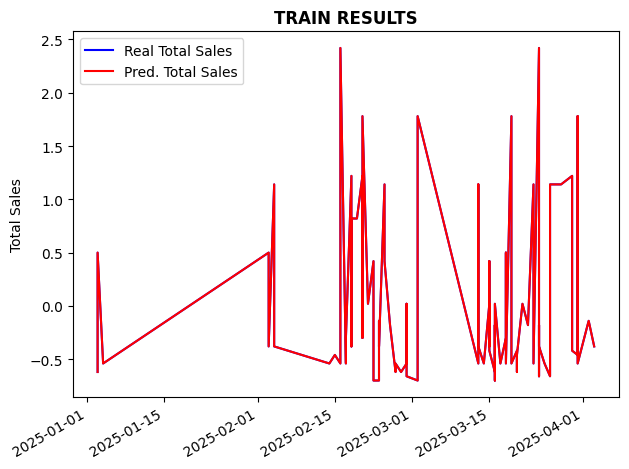

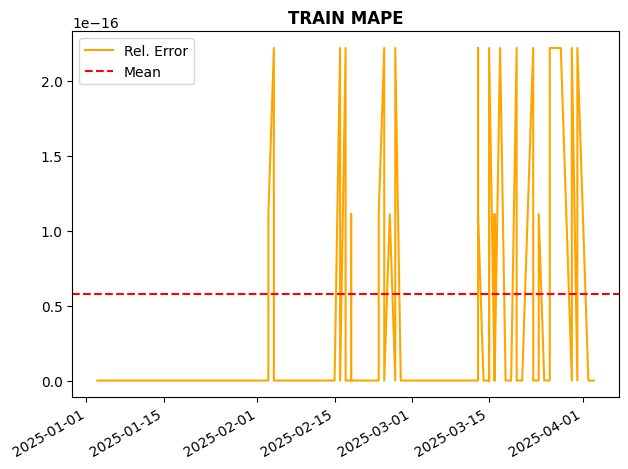

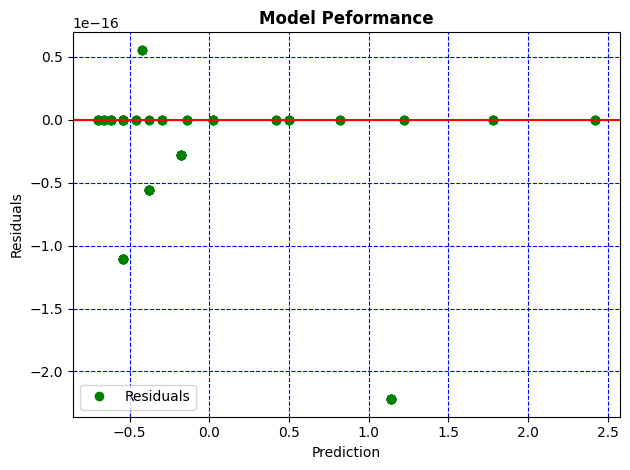

In [25]:
plt.figure()
plt.plot(train_results["Real Total Sales"], color="b", label="Real Total Sales")
plt.plot(train_results["Pred. Total Sales"], color="r", label="Pred. Total Sales")
plt.gcf().autofmt_xdate()
plt.title('TRAIN RESULTS', fontweight='bold')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()
print("")

plt.figure()
plt.plot(train_results["Rel. Error"], color="orange", label="Rel. Error")
plt.axhline(train_metrics["MAPE"].iloc[0], color='r', linestyle='dashed', label='Mean')
plt.gcf().autofmt_xdate()
plt.title('TRAIN MAPE', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()
print("")

plt.figure()
plt.plot(train_results['Pred. Total Sales'], train_results['Residuals'],'o', color='g',label='Residuals')
plt.grid(color='b',linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Model Peformance", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

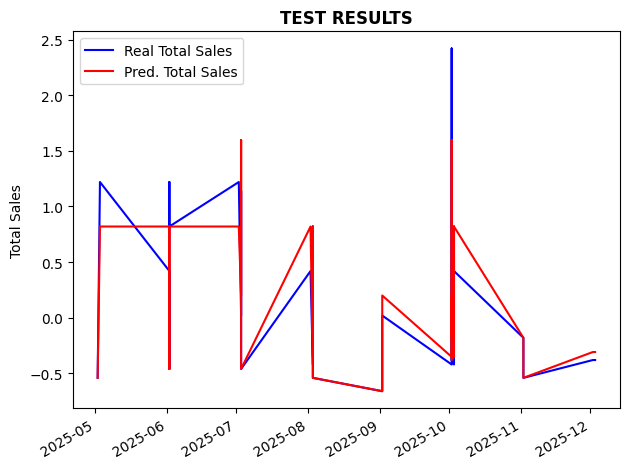

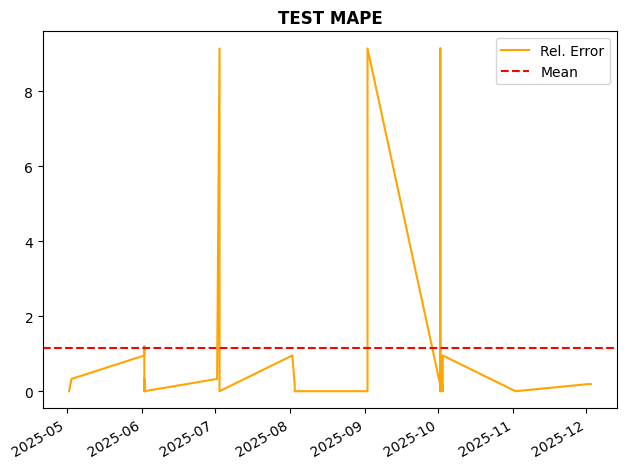

In [26]:
plt.figure()
plt.plot(test_results["Real Total Sales"], color="b", label="Real Total Sales")
plt.plot(test_results["Pred. Total Sales"], color="r", label="Pred. Total Sales")
plt.gcf().autofmt_xdate()
plt.title('TEST RESULTS', fontweight='bold')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()
print("")

plt.figure()
plt.plot(test_results["Rel. Error"], color="orange", label="Rel. Error")
plt.axhline(test_metrics["MAPE"].iloc[0], color='r', linestyle='dashed', label='Mean')
plt.gcf().autofmt_xdate()
plt.title('TEST MAPE', fontweight='bold')
plt.tight_layout()
plt.legend()
plt.show()